# CMPS460 - PROJECT

## Names and Quids:
- Mohammed Salah - 201912733
- Osama Osman - 201909415
- Salman Taher - 201909507
- Ammar Elkhatib - 202005196


## Introduction:

Hotel booking cancellations can significantly impact the hospitality industry, affecting revenue management, resource allocation, and overall customer satisfaction. Predicting whether a booking will be canceled can help hotel managers optimize operations, improve occupancy rates, and enhance guest experiences. This project aims to develop a machine learning model to predict the likelihood of a hotel booking being canceled based on various features related to the booking and guest details.


## The data and the source:
[Hotel booking demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)


## Importing the needed libraries  

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, Normalizer, QuantileTransformer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import nbformat
from sklearn.inspection import permutation_importance

import math

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
torch.set_printoptions(precision=4, sci_mode=False)

## Importing the dataset and display a brief information about it.

In [2]:
df = pd.read_csv("./hotel_bookings.csv")

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Display summary statistics for numerical columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Exploratory Data Analysis


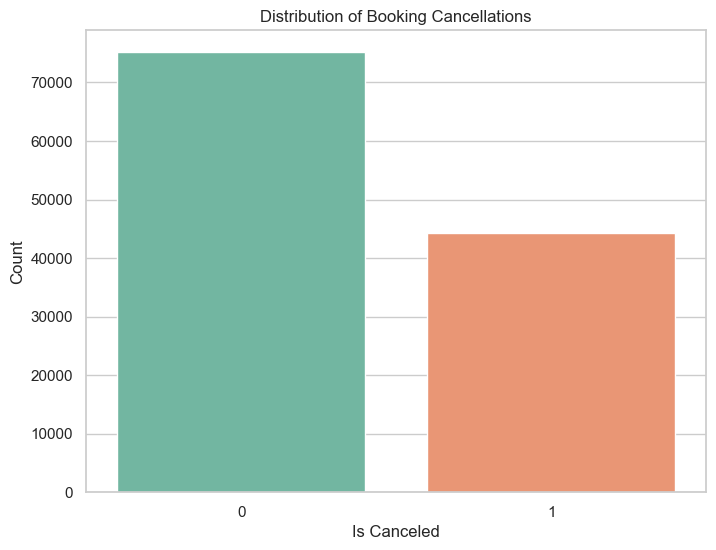

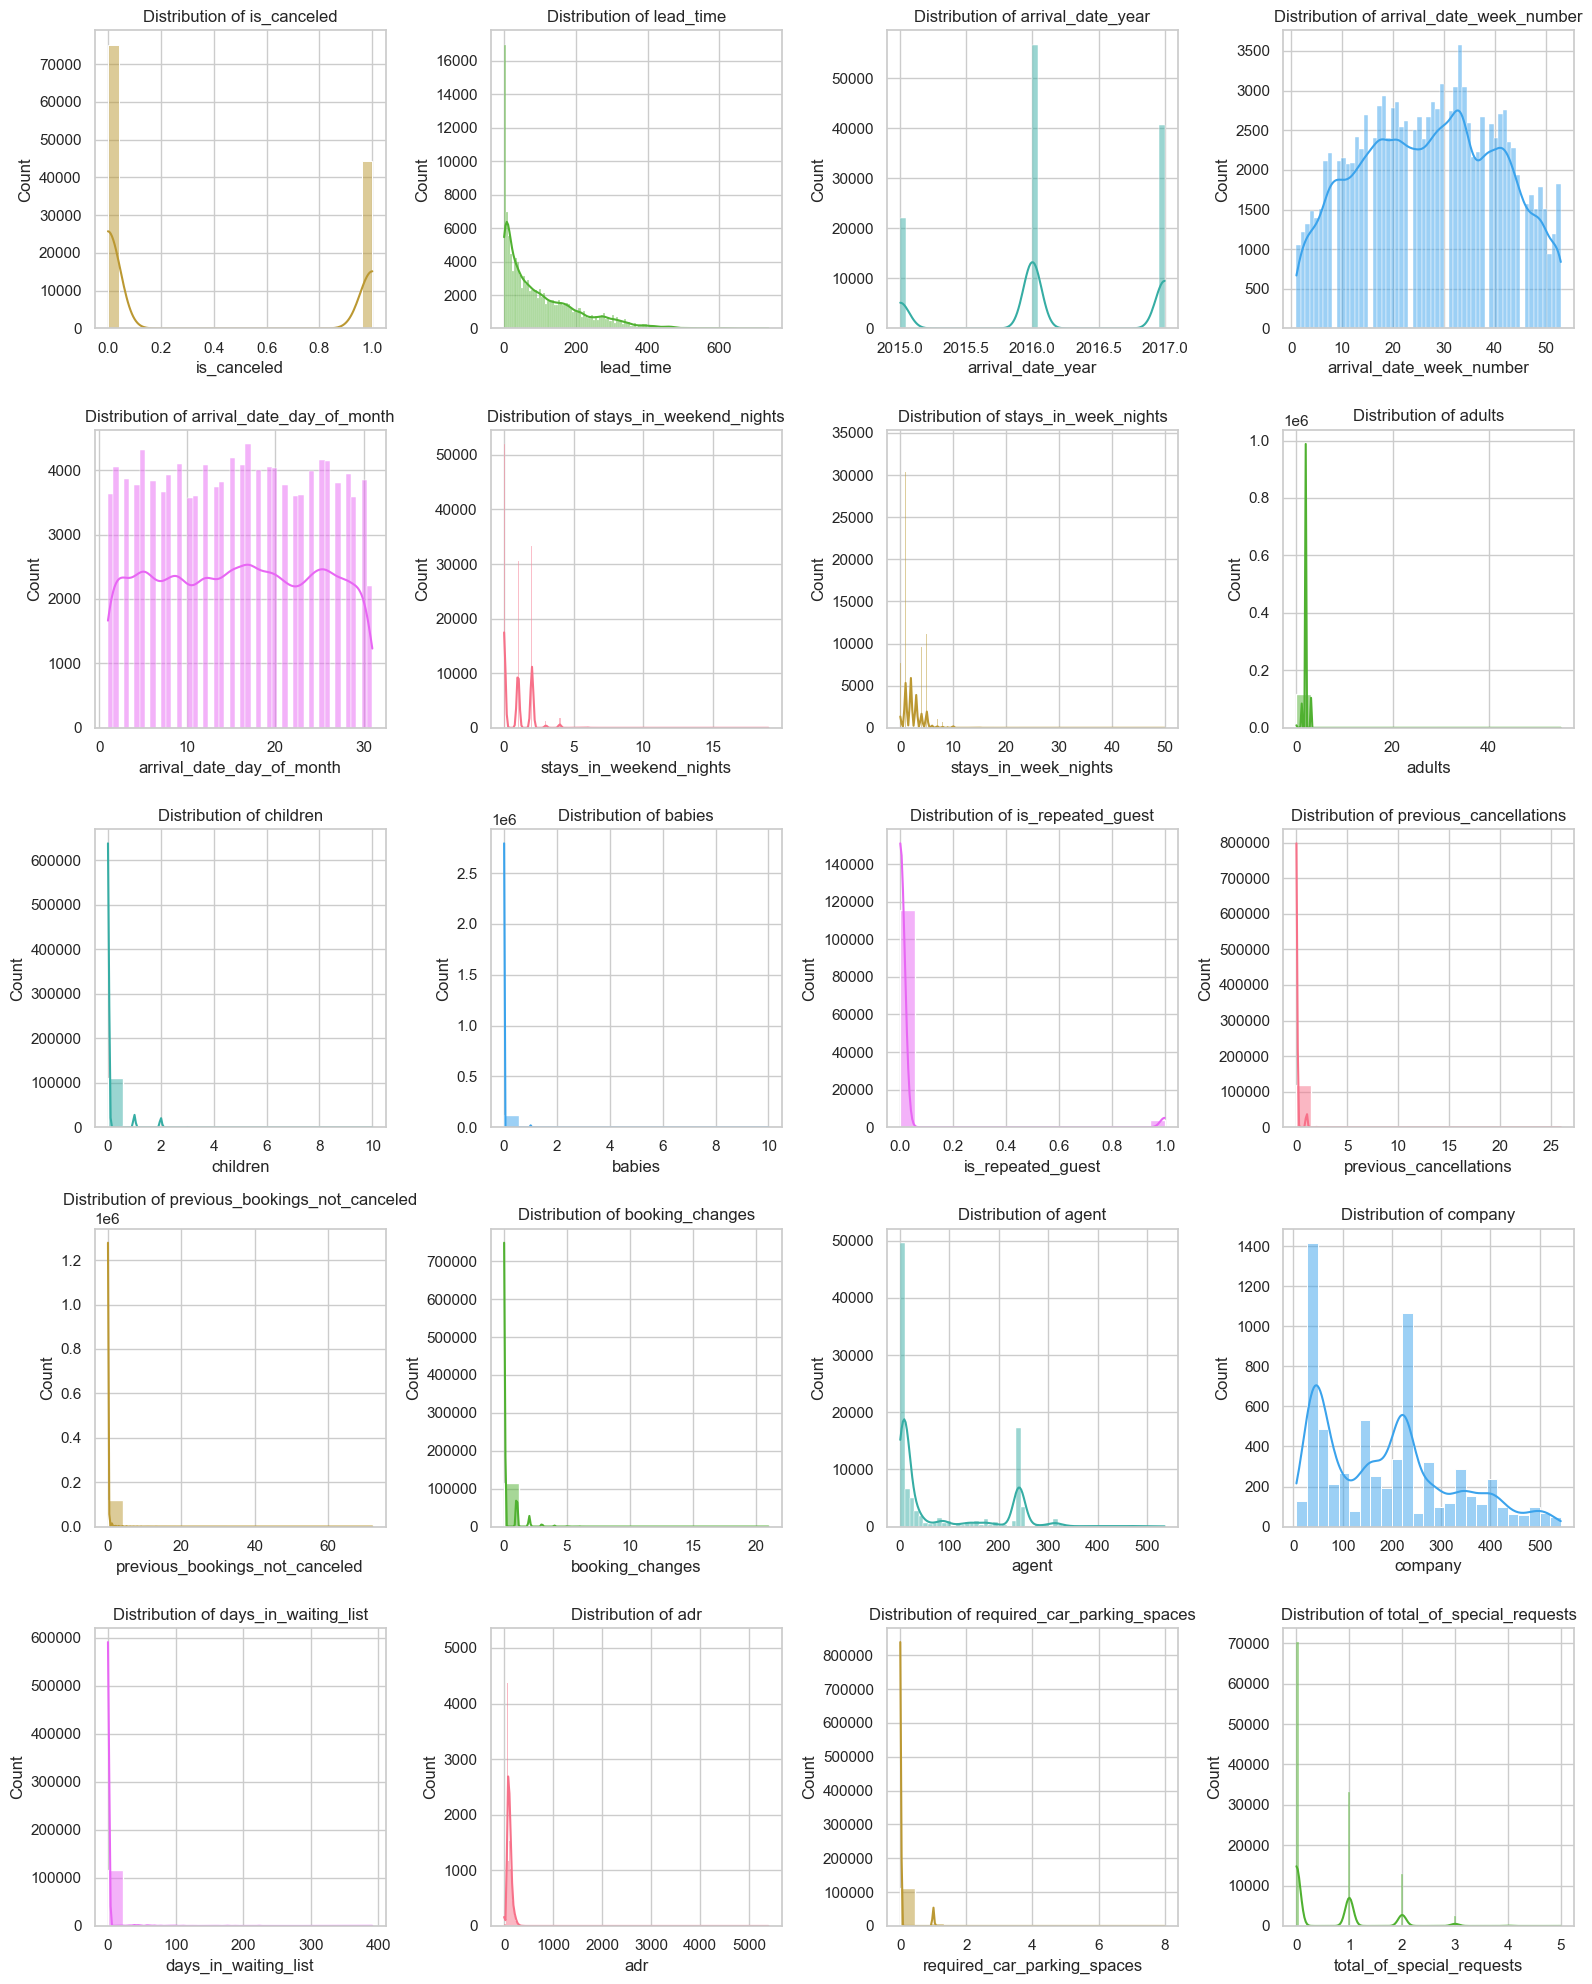

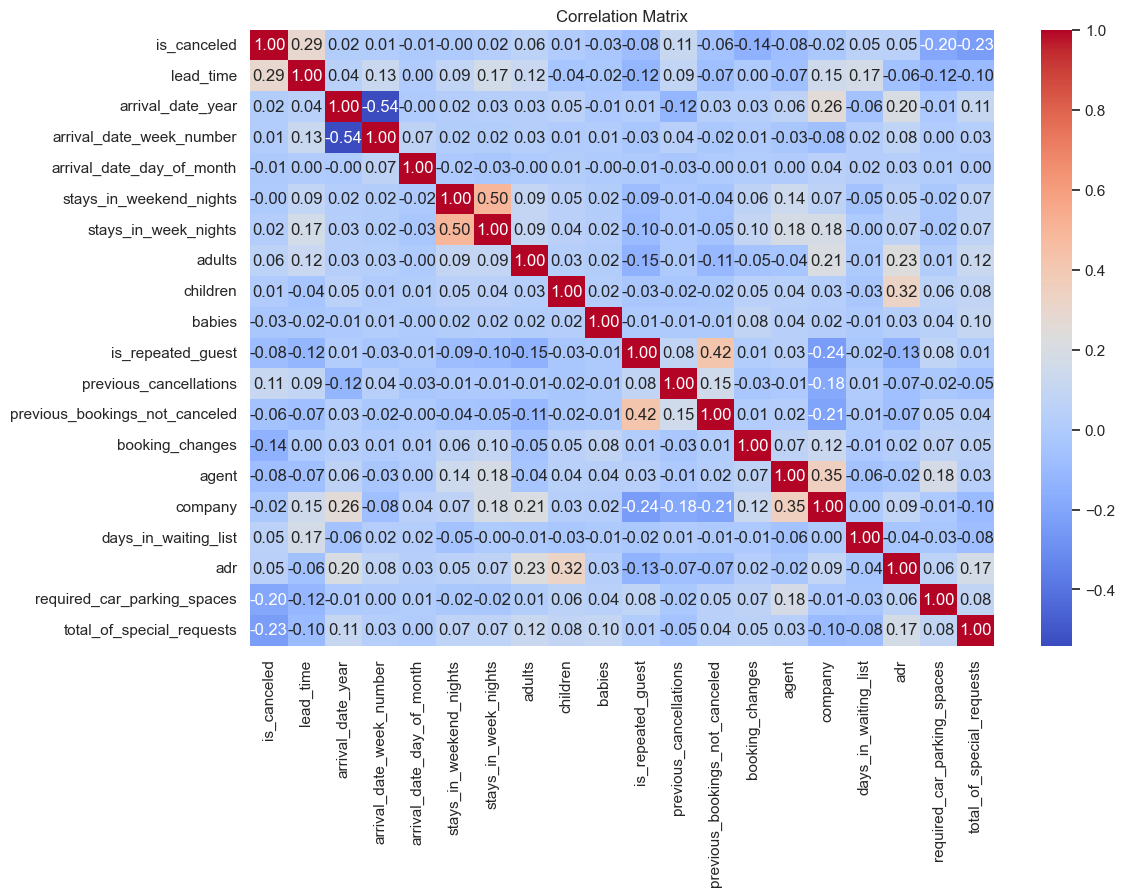

In [4]:
# Set the aesthetic style of the plots and color palette
sns.set(style="whitegrid", palette="muted")

# Visualize the distribution of the target variable 'is_canceled'
plt.figure(figsize=(8, 6))
sns.countplot(x='is_canceled', data=df, hue='is_canceled', palette='Set2', dodge=False)
plt.title('Distribution of Booking Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Count')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

# Select only numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
n_features = len(numerical_features)
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(16, 4 * n_rows))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col].dropna(), kde=True, color=sns.color_palette('husl')[i % len(sns.color_palette('husl'))])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Insights from the graphs above:
### Distribution of Booking Cancellations
- A significant portion of the bookings were not canceled, as indicated by the higher count for 0 (not canceled) compared to 1 (canceled).
- This imbalance suggests that the dataset has more instances of bookings that were not canceled, this imbalance is crucial for model training and may require further actions.
### Distribution of Features
- **Lead Time:** The distribution is right-skewed, indicating that most bookings have a lead time of fewer than 200 days.
- **Arrival Date Year:** Most data points are concentrated around the years 2016 and 2017, suggesting that the dataset mainly includes bookings from these years.
- **Arrival Date Week Number:** Bookings are fairly evenly distributed throughout the year, with some peaks indicating higher booking volumes during certain weeks.
- **Arrival Date Day of Month:** The distribution appears uniform, indicating no particular day of the month has a significantly higher booking count.
- **Stays in Weekend Nights and Week Nights:** Most bookings are for stays involving fewer than 5 nights, whether on weekends or weekdays.
- **Number of Adults, Children, and Babies:** Most bookings are for 1-2 adults, with very few bookings including children or babies.
- **Is Repeated Guest:** The majority of guests are not repeat visitors, with a higher count for 0.
- **Previous Cancellations:** Most guests have no previous cancellations.
- **Booking Changes:** The distribution shows that most bookings have zero or one booking change.
- **Distribution of ADR (Average Daily Rate):** The ADR distribution is right-skewed, indicating that most bookings have an ADR below 200.
- **Required Car Parking Spaces:** Most bookings do not require car parking spaces.
- **Total Special Requests:** Most bookings have zero to one special request.
### Correlation Matrix
- **Is Canceled:**
    - **Lead Time:** Shows a moderate positive correlation (0.29) with cancellations, indicating that bookings made further in advance are more likely to be canceled.
    - **Previous Cancellations:** Also shows a positive correlation (0.11), meaning guests who have canceled before are more likely to cancel again.
    - **ADR:** Has a slight negative correlation with cancellations (-0.10), suggesting that higher daily rates might be associated with lower cancellation rates.
    - **Total Special Requests:** Shows a negative correlation (-0.23), indicating that bookings with more special requests are less likely to be canceled.
    
- **Inter-Feature Correlations:**
    - **Adults and Children:** Show a moderate correlation (0.32), indicating that bookings with more adults are likely to include children.
    - **Previous Cancellations and Previous Bookings Not Canceled:** Show a strong negative correlation (-0.15), meaning that guests with more non-canceled bookings have fewer cancellations.
    - **ADR and Company:** Show a positive correlation (0.21), indicating that certain companies might be associated with higher rates.


# Data Cleaning and Preprocessing

## Handling Duplicates: 
    
Identify and Remove Duplicates:
Removing duplicates ensures that repeated instances do not bias the results.

In [5]:
# Checking for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Removing duplicates
df = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {df.shape[0]}")


Number of duplicate rows: 31994
Number of rows after removing duplicates: 87396


Duplicates can bias the model by giving more weight to certain instances. Removing them ensures that each instance contributes equally to the model.


## Handling Missing Values
Identify Missing Values:
Understand the extent and distribution of missing values.

In [6]:
# Checking for missing values
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")


Missing values in each column:
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company  

## Remove Columns with Excessive Missing Values:
Columns with more than 60% missing values are typically not useful.


In [7]:
# Removing columns with more than 60% missing values
threshold = 0.6
df = df.loc[:, df.isnull().mean() < threshold]
print(f"Columns remaining after removing those with >{threshold*100}% missing values:\n{df.columns}")


Columns remaining after removing those with >60.0% missing values:
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


## Impute Missing Values:
Use mean/median for numerical features and mode for categorical features.


In [8]:
# Imputing missing values for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)  # Median is robust to outliers

# Imputing missing values for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)  # Mode is suitable for categorical data


- **Mean/Median Imputation:** Suitable for numerical data, with median being robust to outliers.
- **Mode Imputation:** Best for categorical data, retaining the most frequent category.


## Handling Outliers
Identify Outliers:
Use visual methods and IQR (Interquartile Range) method.


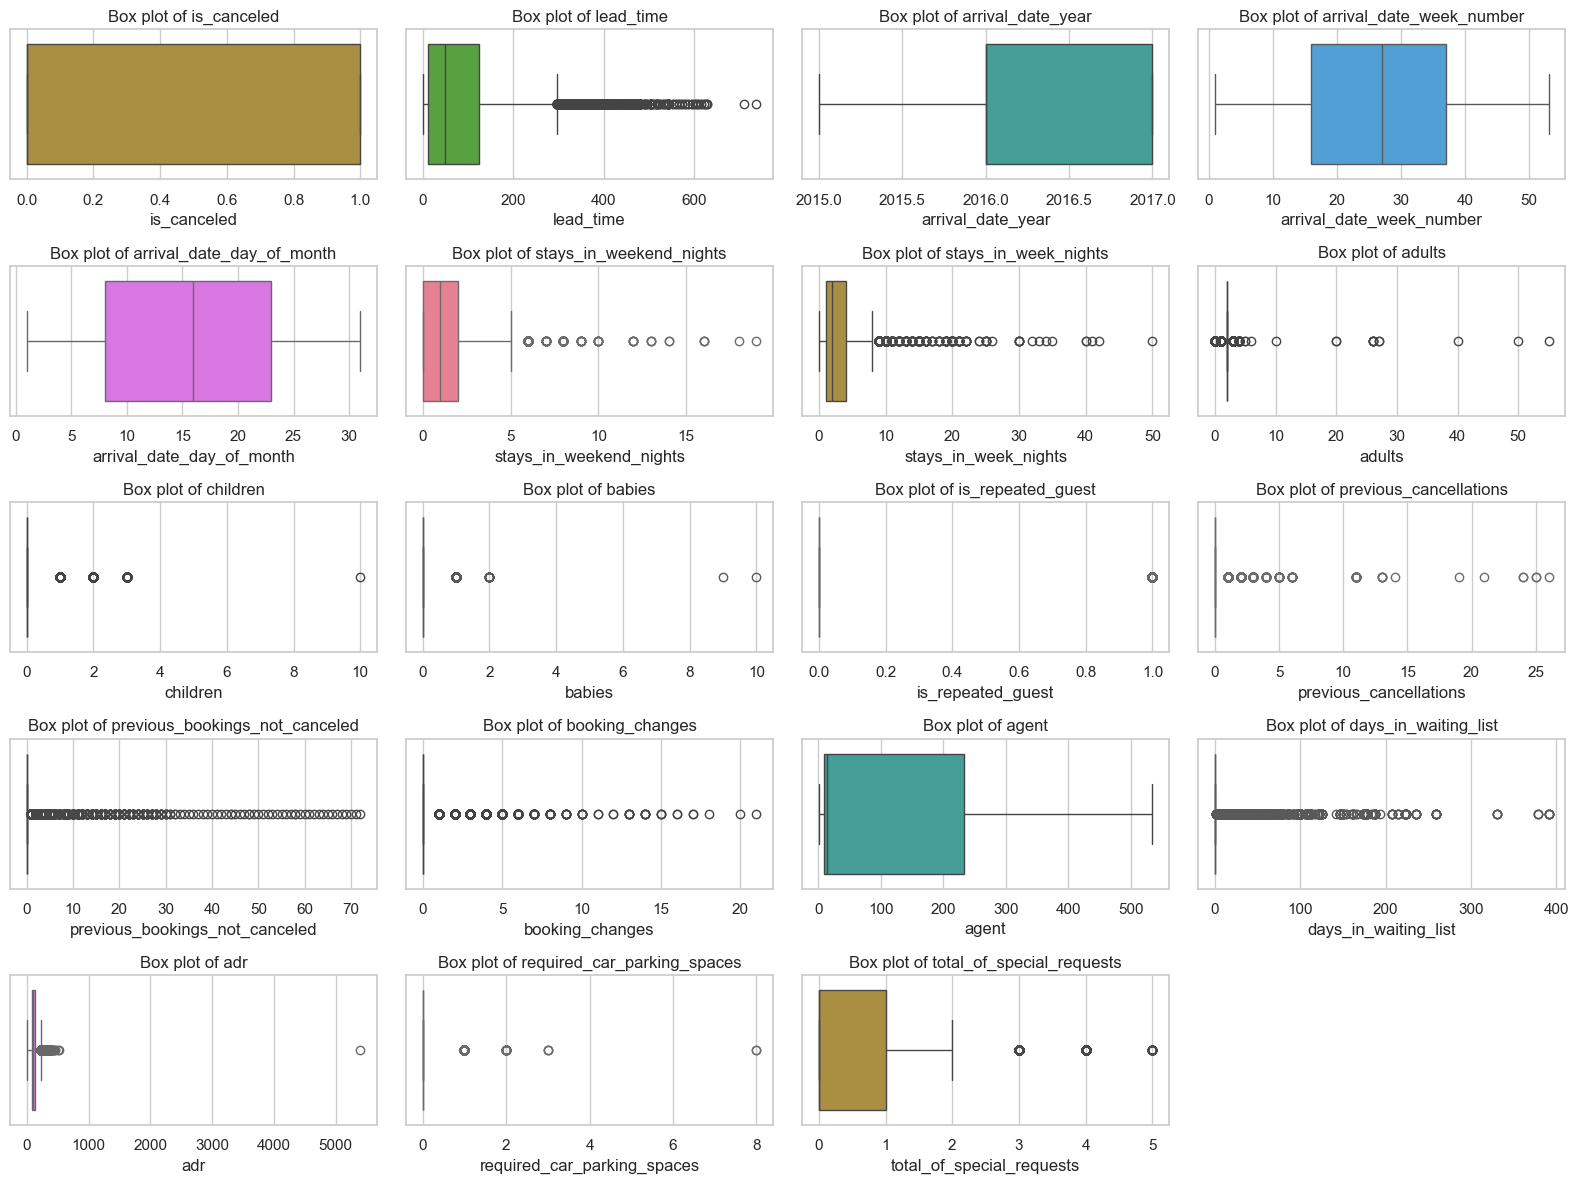

Outliers in each numerical feature:
is_canceled                           0
lead_time                          2396
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights             220
stays_in_week_nights               1531
adults                            22899
children                           8364
babies                              914
is_repeated_guest                  3415
previous_cancellations             1685
previous_bookings_not_canceled     3545
booking_changes                   15902
agent                                 0
days_in_waiting_list                860
adr                                2490
required_car_parking_spaces        7313
total_of_special_requests          2673
dtype: int64


In [9]:
# Visualizing outliers using box plots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color=sns.color_palette('husl')[i % len(sns.color_palette('husl'))])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Identifying outliers using IQR method
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers in each numerical feature:\n{outliers}")


- **Visual Identification:** We used box plots because they help to visually detect outliers.


## Handle Outliers:
Using capping (winsorization) to replace outliers with threshold values.


In [10]:
# Capping outliers
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


- **IQR Method:** A robust method to detect outliers that does not assume normal distribution.
- **Capping (Winsorization):** Retains data points while minimizing the impact of outliers.

## Identify Categorical Variables:
We will encode categorical variables using one-hot encoding for non-ordinal data and label encoding for ordinal data.


In [11]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print(f"Categorical features:\n{categorical_features}")


Categorical features:
Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')


## Encode Categorical Variables:
Use LabelEncoder for binary/ordinal features and OneHotEncoder for nominal features.


In [12]:
# Encode categorical features
label_encoder = LabelEncoder()

# Columns to be encoded
categorical_features = df.select_dtypes(include=['object']).columns
print(f"Categorical features before encoding:\n{categorical_features}")

# Encode each categorical feature
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

print(f"Columns after encoding categorical features:\n{df.columns}")


Categorical features before encoding:
Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')
Columns after encoding categorical features:
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_

In [13]:
# Verify all columns are now numeric
print(df.info())

# Identify numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerical features:\n{numerical_features}")


<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  int32  
 1   is_canceled                     87396 non-null  float64
 2   lead_time                       87396 non-null  float64
 3   arrival_date_year               87396 non-null  float64
 4   arrival_date_month              87396 non-null  int32  
 5   arrival_date_week_number        87396 non-null  float64
 6   arrival_date_day_of_month       87396 non-null  float64
 7   stays_in_weekend_nights         87396 non-null  float64
 8   stays_in_week_nights            87396 non-null  float64
 9   adults                          87396 non-null  float64
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  float64
 12  meal                            8739

# Correlation and Relationship Analysis


## Correlation Matrix
The correlation matrix reveals the following key relationships:
- `lead_time` has a positive correlation with `is_canceled` (correlation coefficient: 0.29). This suggests that longer lead times are associated with a higher likelihood of cancellation.
- `previous_cancellations` and `previous_bookings_not_canceled` show a moderate correlation with `is_canceled`, indicating past booking behavior influences current cancellations.
- `adr` (average daily rate) has a weak negative correlation with `is_canceled`, suggesting that higher rates may slightly reduce the likelihood of cancellations.

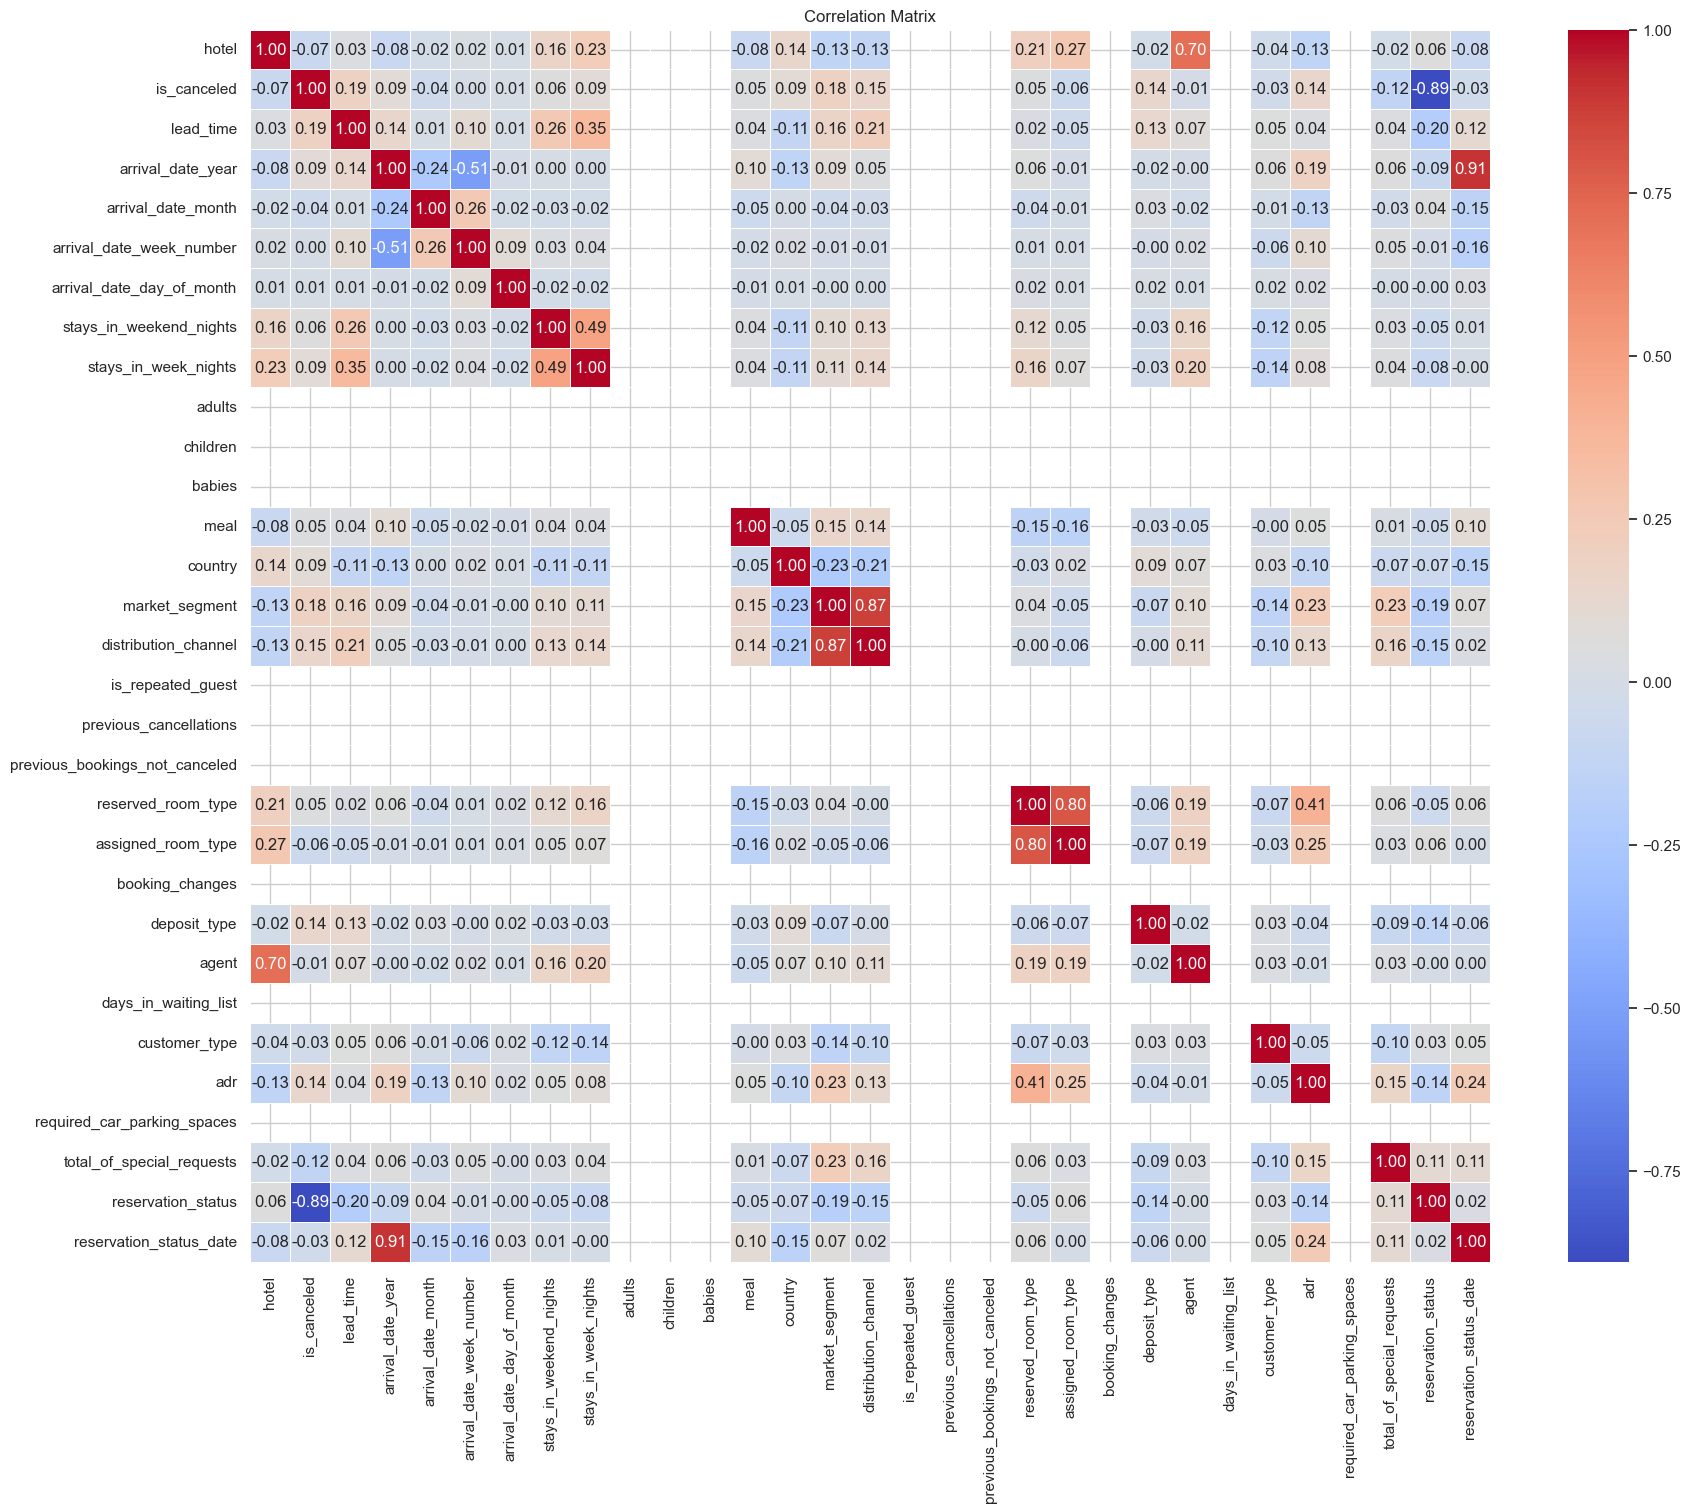

In [14]:
# Correlation matrix for numerical features
corr_matrix = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


## Pairwise Relationships
The pair plot indicates:
- A noticeable separation in the distributions of `lead_time` and `adr` between canceled and non-canceled bookings.
- Features such as `total_of_special_requests` show distinct patterns between the two classes.

Subset features for pair plot:
['lead_time', 'adr', 'total_of_special_requests', 'previous_cancellations', 'previous_bookings_not_canceled', 'is_canceled']


<Figure size 2000x1600 with 0 Axes>

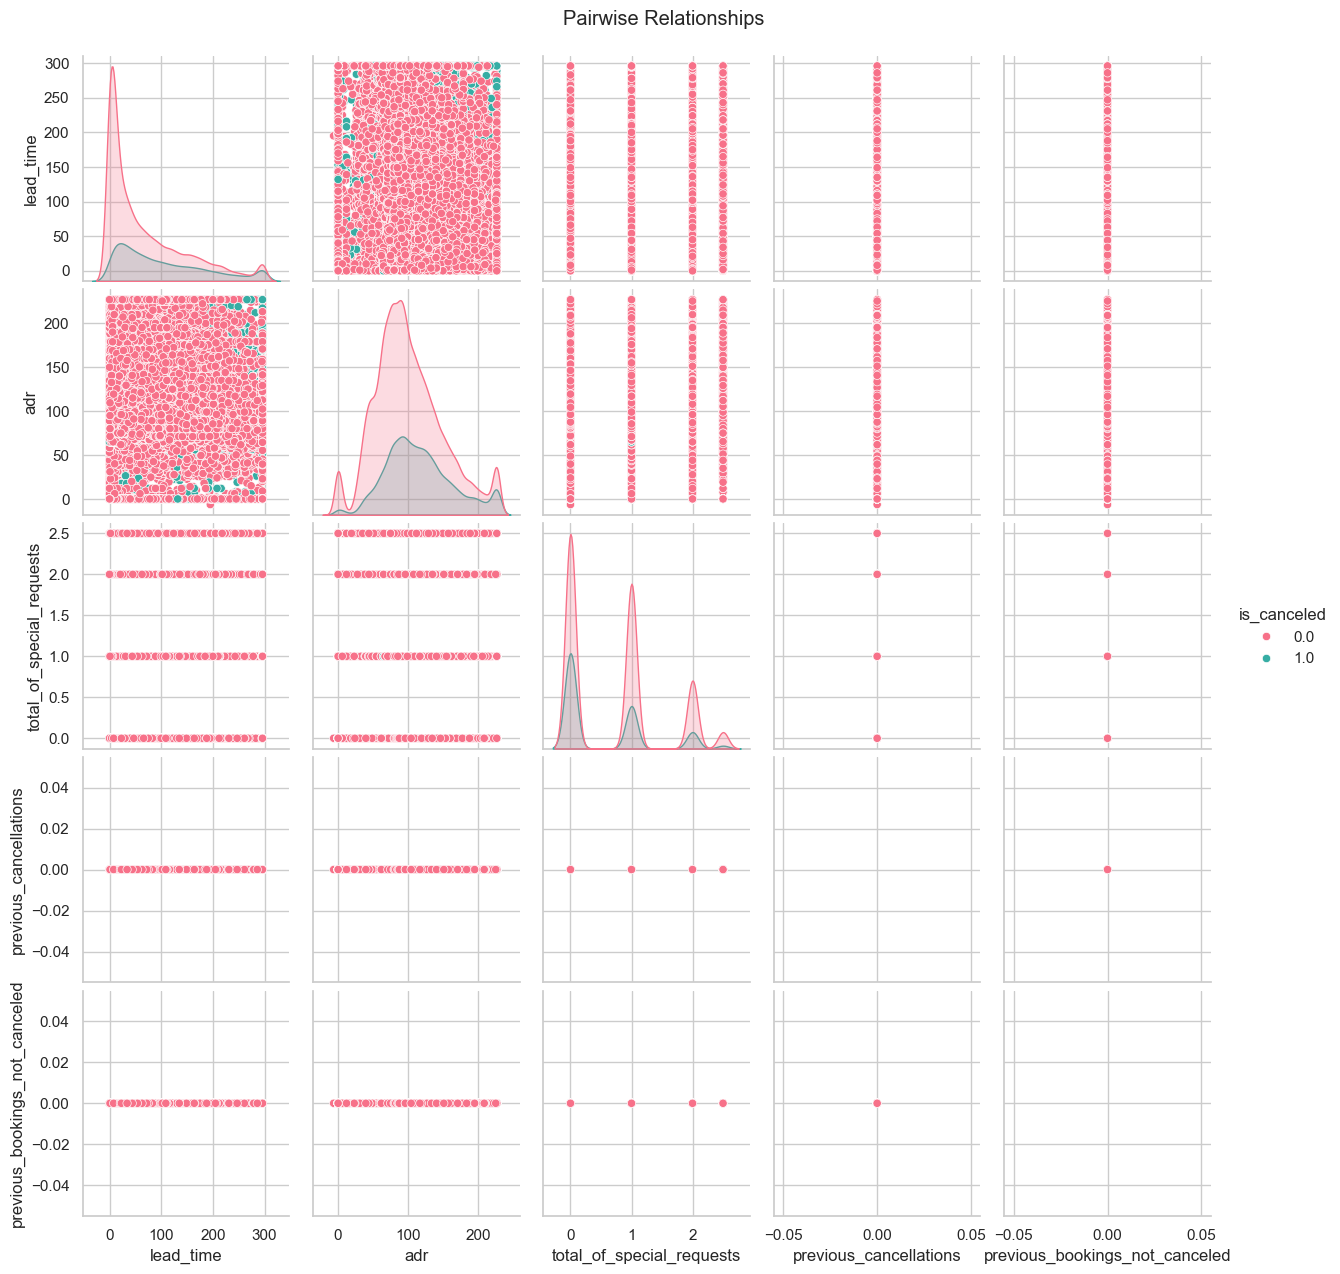

In [15]:
# Select a subset of numerical features for the pair plot
subset_features = ['lead_time', 'adr', 'total_of_special_requests', 'previous_cancellations', 'previous_bookings_not_canceled', 'is_canceled']

# Ensure the subset_features are in the DataFrame
subset_features = [feature for feature in subset_features if feature in df.columns]

# Print the subset of features being used
print(f"Subset features for pair plot:\n{subset_features}")

# Plot pairwise relationships
plt.figure(figsize=(20, 16))
sns.pairplot(df[subset_features], hue='is_canceled', palette='husl', diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()



## Detailed Analysis
- **Lead Time vs. Is Canceled**: Scatter and box plots reveal that bookings with longer lead times are more likely to be canceled.
- **ADR vs. Is Canceled**: Scatter and box plots show that lower ADR values are more common in canceled bookings.
- **Total of Special Requests vs. Is Canceled**: Higher numbers of special requests seem to be associated with fewer cancellations.


C:\Users\MOHAM\AppData\Local\Temp\ipykernel_24912\1969032896.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[col], y=df['is_canceled'], alpha=0.6, palette='Set2')
C:\Users\MOHAM\AppData\Local\Temp\ipykernel_24912\1969032896.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[col], y=df['is_canceled'], alpha=0.6, palette='Set2')
C:\Users\MOHAM\AppData\Local\Temp\ipykernel_24912\1969032896.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[col], y=df['is_canceled'], alpha=0.6, palette='Set2')


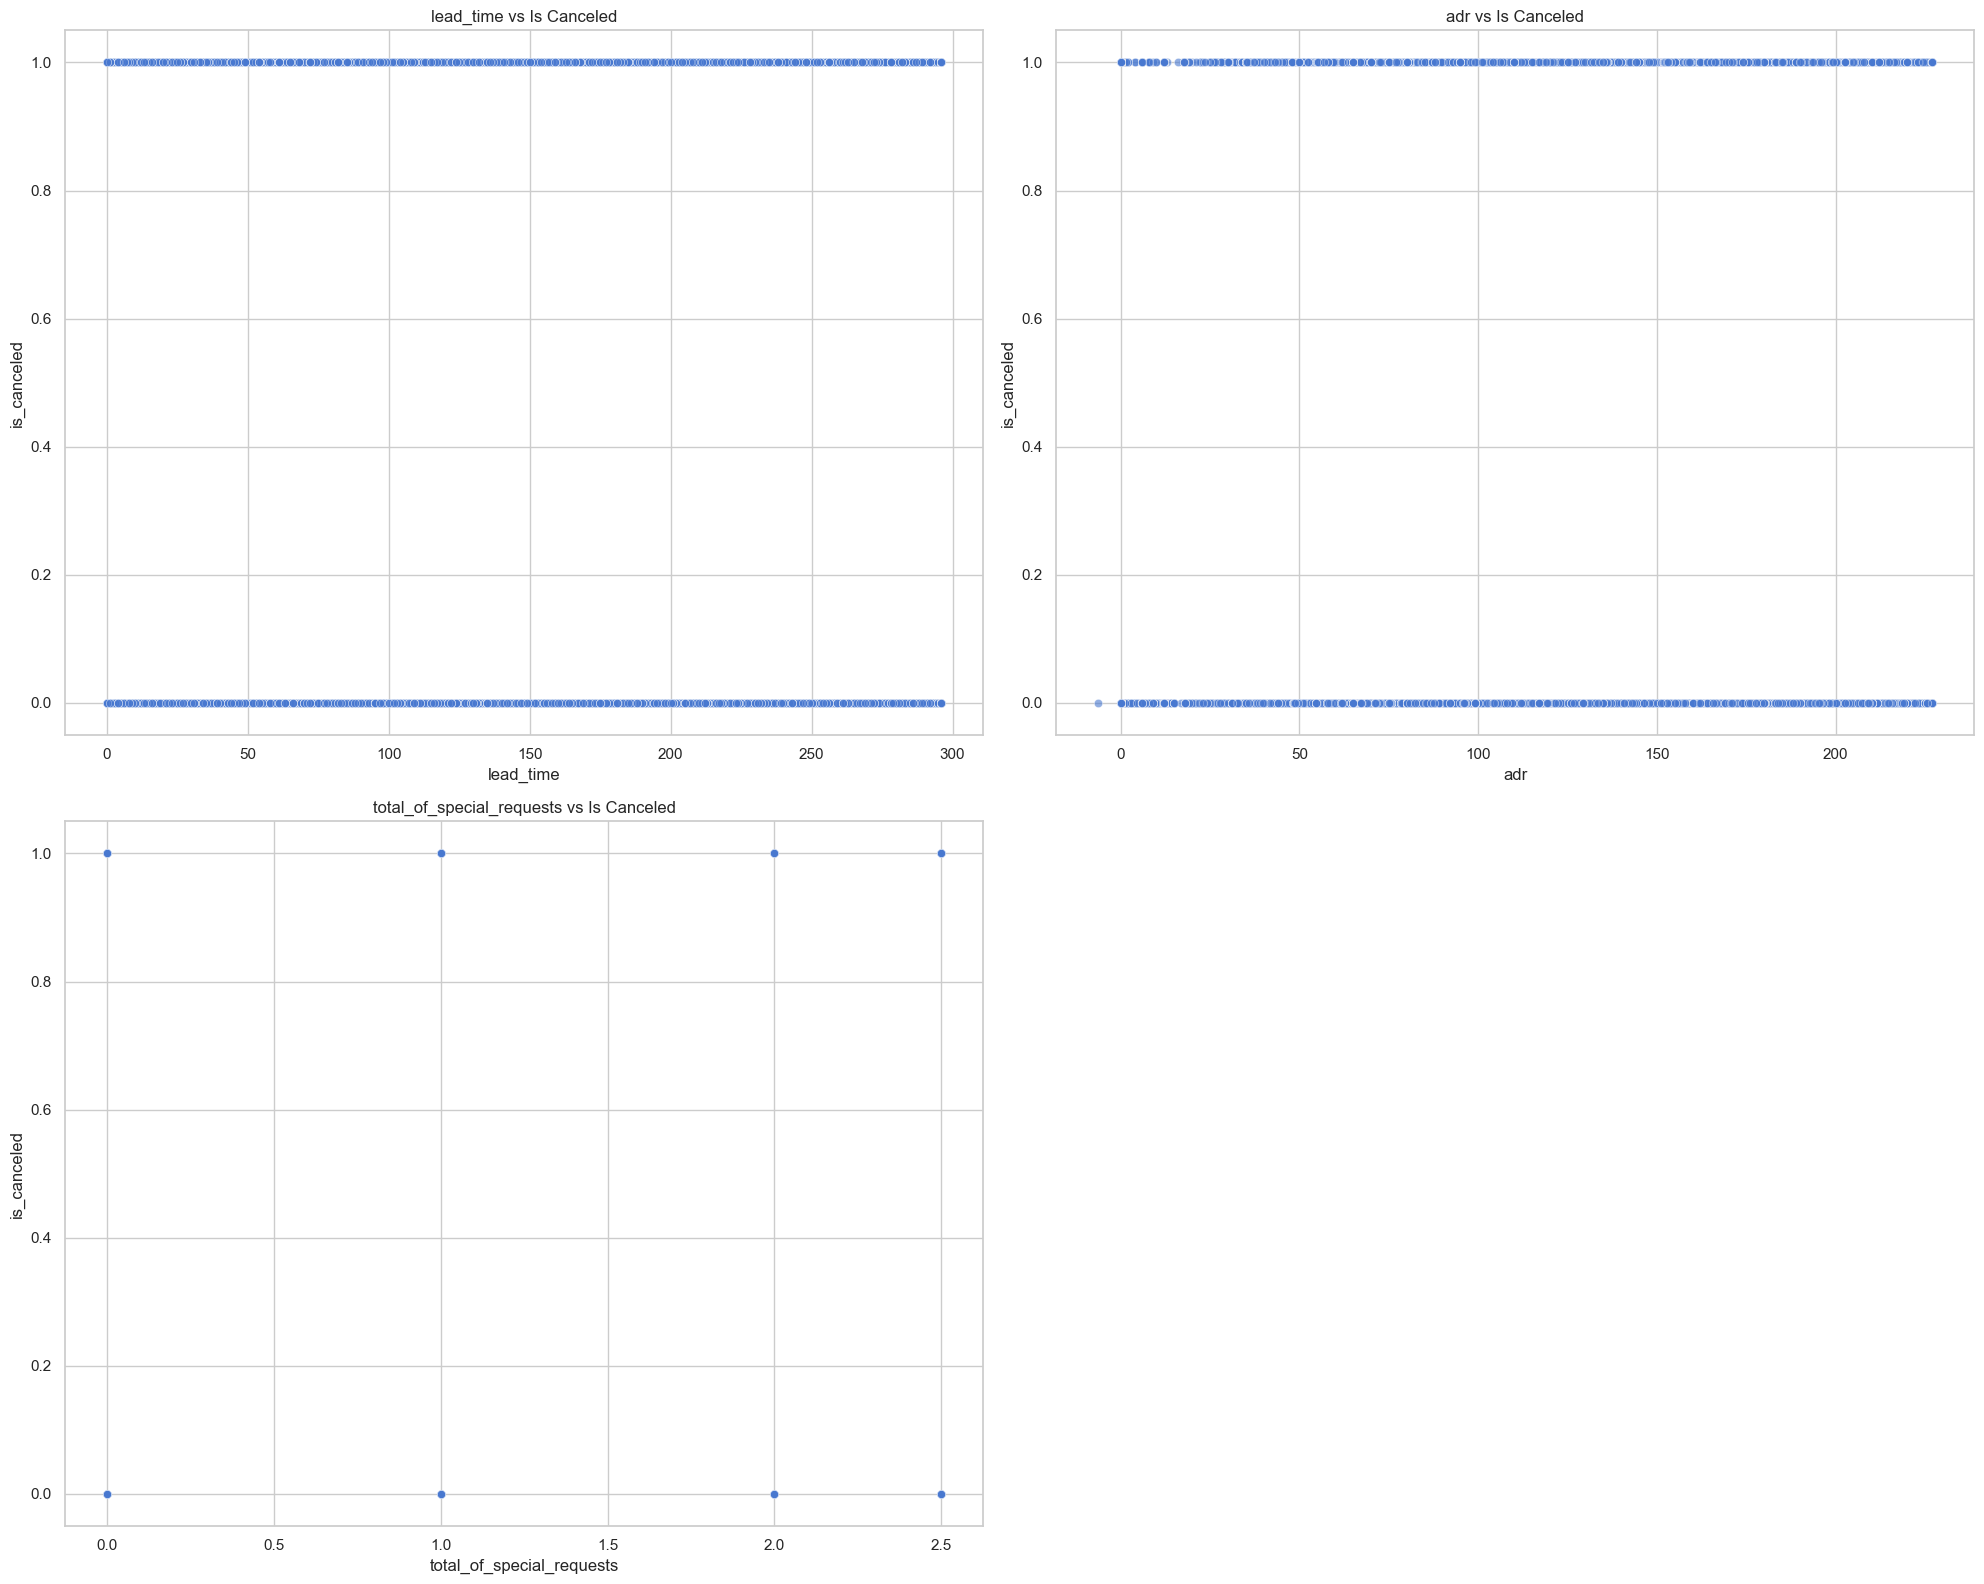

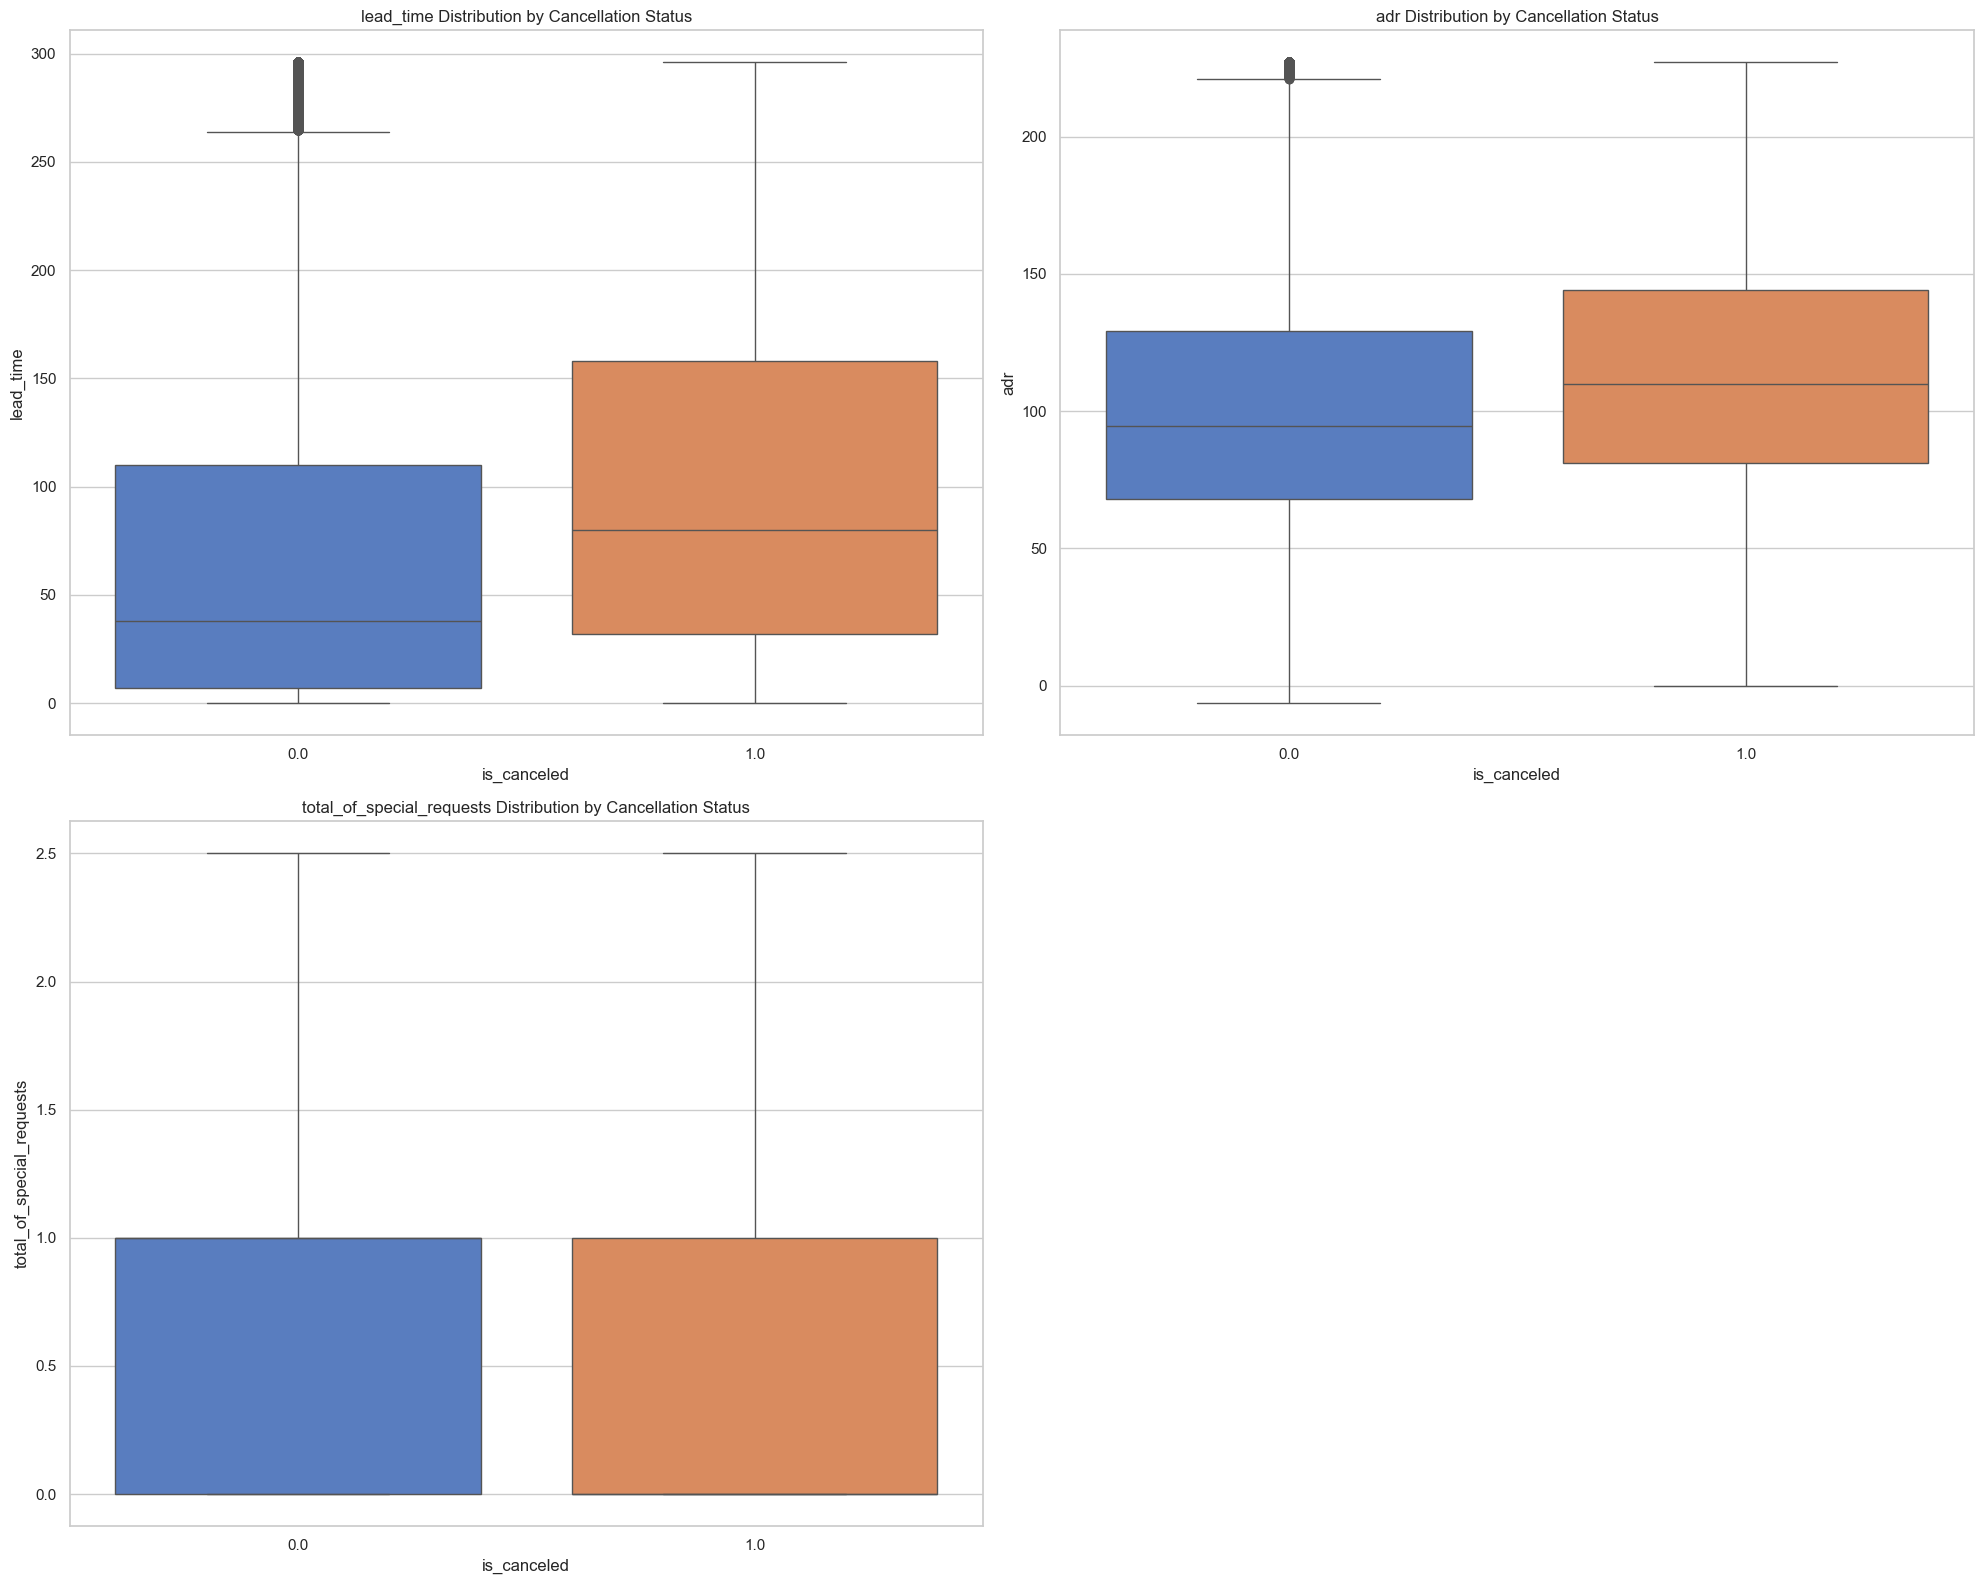

In [16]:
# Scatter plots for selected features against the target variable
selected_features = ['lead_time', 'adr', 'total_of_special_requests']
plt.figure(figsize=(20, 16))
for i, col in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df['is_canceled'], alpha=0.6, palette='Set2')
    plt.title(f'{col} vs Is Canceled')
plt.tight_layout()
plt.show()

# Box plots to see the distribution of features based on the target variable
plt.figure(figsize=(20, 16))
for i, col in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df['is_canceled'], y=df[col], hue=df['is_canceled'], legend=False)
    plt.title(f'{col} Distribution by Cancellation Status')
plt.tight_layout()
plt.show()


## Define Features and Target Variable:


In [17]:
# Define the target variable
target = 'is_canceled'

# Define the feature set and remove potential leaking features
leaking_features = ['reservation_status', 'reservation_status_date']
features_cleaned = df.drop(columns=[target] + leaking_features)

# Define the target set
target = df[target]


## Split the Dataset:


In [18]:
# Split the dataset into training and testing sets using stratified sampling
X_train_cleaned, X_test_cleaned, y_train, y_test = train_test_split(features_cleaned, target, test_size=0.2, random_state=42, stratify=target)

# Verify the split
print(f"Training set size: {X_train_cleaned.shape[0]}")
print(f"Testing set size: {X_test_cleaned.shape[0]}")

# Check the distribution of classes in the original, training, and testing sets
print(f"Original dataset class distribution:\n{target.value_counts(normalize=True)}")
print(f"Training set class distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing set class distribution:\n{y_test.value_counts(normalize=True)}")


Training set size: 69916
Testing set size: 17480
Original dataset class distribution:
is_canceled
0.0    0.725102
1.0    0.274898
Name: proportion, dtype: float64
Training set class distribution:
is_canceled
0.0    0.725099
1.0    0.274901
Name: proportion, dtype: float64
Testing set class distribution:
is_canceled
0.0    0.725114
1.0    0.274886
Name: proportion, dtype: float64


# Model Selection and Training

## Decision Tree:


There were several reasons for why whe chose Decision tree as our traditional ML model for this project:

- **Dataset Characteristics:** Handles both numerical and categorical features effectively.
- **Model Complexity:** Simple, interpretable, and easy to visualize with constrained depth.
- **Performance Metrics:** Provides good baseline metrics for classification tasks.

In [19]:
## create an array to store the confusion matrix of each model in it
## we will need this later in the evaluation part
confusion_matrix_list = []

Decision Tree Accuracy: 0.7821
Confusion Matrix:
[[11708   967]
 [ 2842  1963]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86     12675
         1.0       0.67      0.41      0.51      4805

    accuracy                           0.78     17480
   macro avg       0.74      0.67      0.68     17480
weighted avg       0.77      0.78      0.76     17480



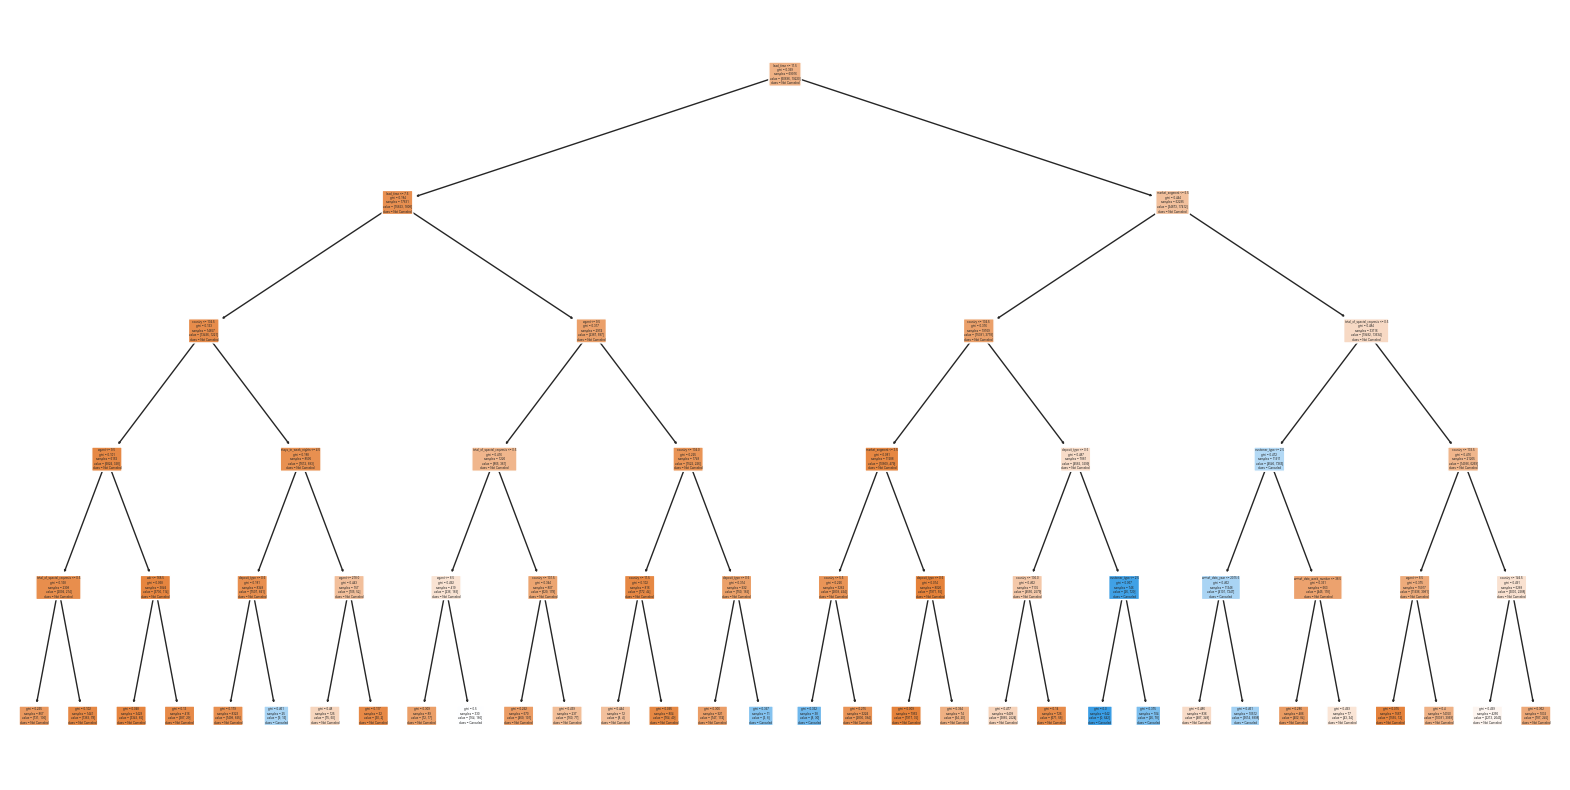

In [20]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(max_depth=5,random_state=42)

# Train the model
decision_tree.fit(X_train_cleaned, y_train)

# Predict on the test set
y_pred_dt = decision_tree.predict(X_test_cleaned)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Confusion Matrix:\n{conf_matrix_dt}")

## Add the confusion matrix of the model to the list and rename it to confusion_matrix_decision_tree
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_dt)
confusion_matrix_list.append(confusion_matrix_decision_tree)

# Classification report
class_report_dt = classification_report(y_test, y_pred_dt)
print(f"Classification Report:\n{class_report_dt}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=features_cleaned.columns, class_names=['Not Canceled', 'Canceled'], rounded=True)
plt.show()


From the output of the above model we can conclude that:
the Decision Tree model has an accuracy of 78.21%, meaning it correctly predicted the class 78.21% of the time. The confusion matrix shows that the model performs better on class 0 than class 1. The classification report further confirms this, with higher precision, recall, and F1-score for class 0. While the model's accuracy is decent, there's room for improvement, particularly in predicting class 1.



## Random Forest:
    
There were several reasons for why whe chose Random Forest as our ensemble ML model for this project:
-   **Dataset Characteristics:** Handles both numerical and categorical features effectively.
- **Model Complexity:** More complex than a single decision tree, mitigates overfitting by averaging  multiple trees.
- **Performance Metrics:** Generally provides high accuracy, good precision, recall, and F1-score. Offers feature importance insights.


Random Forest Accuracy: 0.8358
Confusion Matrix:
[[11647  1028]
 [ 1842  2963]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     12675
         1.0       0.74      0.62      0.67      4805

    accuracy                           0.84     17480
   macro avg       0.80      0.77      0.78     17480
weighted avg       0.83      0.84      0.83     17480

Feature ranking (Random Forest):
1. feature lead_time (0.1628404917488789)
2. feature country (0.11539184626232112)
3. feature adr (0.11174843147200425)
4. feature arrival_date_day_of_month (0.08340603646753345)
5. feature arrival_date_week_number (0.0738246477821959)
6. feature total_of_special_requests (0.06924700838209329)
7. feature agent (0.06334578349727935)
8. feature stays_in_week_nights (0.05197633895778747)
9. feature market_segment (0.04085785658618426)
10. feature arrival_date_month (0.03898055096983111)
11. feature stays_in_weekend_nights (0.032835221

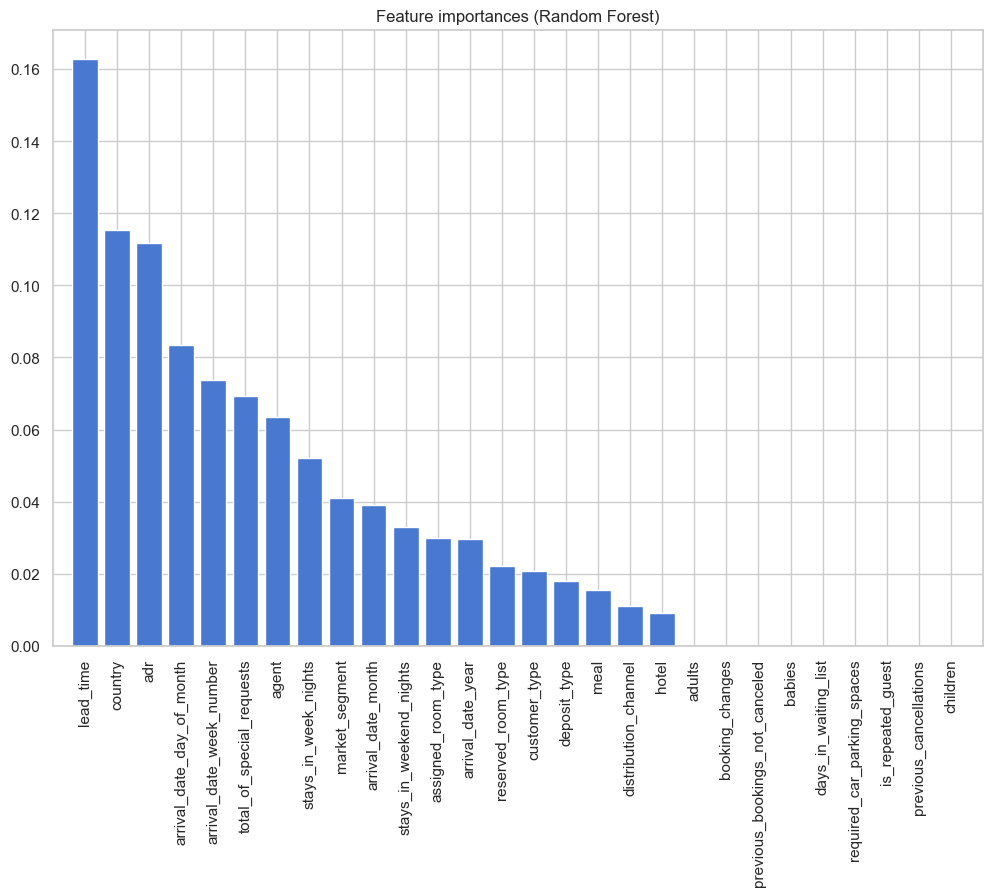

In [21]:
# Initialize the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train_cleaned, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_cleaned)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix:\n{conf_matrix_rf}")

# Add the confusion matrix of the model to the list and rename it to confusion_matrix_random_forest
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_list.append(confusion_matrix_random_forest)

# Classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print(f"Classification Report:\n{class_report_rf}")

# Get feature importances
importances_rf = random_forest.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

# Print the feature ranking
print("Feature ranking (Random Forest):")
for f in range(X_train_cleaned.shape[1]):
    print(f"{f + 1}. feature {features_cleaned.columns[indices_rf[f]]} ({importances_rf[indices_rf[f]]})")

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature importances (Random Forest)")
plt.bar(range(X_train_cleaned.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train_cleaned.shape[1]), features_cleaned.columns[indices_rf], rotation=90)
plt.xlim([-1, X_train_cleaned.shape[1]])
plt.show()


The Random Forest model has an accuracy of 83.58%, meaning it correctly predicted the class 83.58% of the time. The confusion matrix shows that the model performs better on class 0 than class 1. The classification report further confirms this, with higher precision, recall, and F1-score for class 0. However, the model's performance on class 1 has improved compared to the Decision Tree model.

The feature ranking shows the importance of each feature in the Random Forest model. The most important feature is 'lead_time', followed by 'country' and 'adr'. Some features like 'adults', 'booking_changes', 'previous_bookings_not_canceled', etc., have zero importance in this model, indicating they do not contribute to the model's decision-making process.

Overall, the Random Forest model performs better than the Decision Tree model, and there's an improvement in predicting class 1.

## Neural Network

There were several reasons for why whe chose Neural Network as our Deep Learning ML model for this project:
- **Dataset Characteristics:**
        The dataset contains both numerical and categorical features. After standardization, neural networks can effectively handle these features.
- **Model Complexity:**
        Neural networks can model complex relationships and interactions between features that might be missed by simpler models like decision trees or random forests.
- **Desired Performance Metrics:**
        Neural networks are capable of achieving high performance metrics such as accuracy, precision, recall, and F1-score, especially with larger and more complex datasets.
    

### Preprocess the Data:


In [22]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


### Create a Dataset and DataLoader:


In [23]:
# Create a dataset and dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


### Define the Neural Network Model:


In [24]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model
input_size = X_train_tensor.shape[1]
model = NeuralNetwork(input_size)


### Define the Loss Function and Optimizer:


In [25]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


### Train the Neural Network:


In [26]:
# Training the neural network
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/20], Loss: 0.3236
Epoch [2/20], Loss: 0.3382
Epoch [3/20], Loss: 0.5632
Epoch [4/20], Loss: 0.3822
Epoch [5/20], Loss: 0.3527
Epoch [6/20], Loss: 0.3443
Epoch [7/20], Loss: 0.4397
Epoch [8/20], Loss: 0.2703
Epoch [9/20], Loss: 0.3958
Epoch [10/20], Loss: 0.3435
Epoch [11/20], Loss: 0.3955
Epoch [12/20], Loss: 0.3211
Epoch [13/20], Loss: 0.2727
Epoch [14/20], Loss: 0.4316
Epoch [15/20], Loss: 0.3437
Epoch [16/20], Loss: 0.6013
Epoch [17/20], Loss: 0.2230
Epoch [18/20], Loss: 0.2714
Epoch [19/20], Loss: 0.5227
Epoch [20/20], Loss: 0.2752


### Evaluate the Neural Network:


In [27]:
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor).squeeze().round()
    y_pred_test = model(X_test_tensor).squeeze().round()

# Convert predictions to integers
y_pred_train = y_pred_train.int().numpy()
y_pred_test = y_pred_test.int().numpy()

# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Training Accuracy: {accuracy_train:.4f}')
print(f'Testing Accuracy: {accuracy_test:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f'Confusion Matrix:\n{conf_matrix}')

# Add the confusion matrix of the model to the list and rename it to confusion_matrix_neural_network
confusion_matrix_neural_network = confusion_matrix(y_test, y_pred_test)
confusion_matrix_list.append(confusion_matrix_neural_network)

# Classification report
class_report = classification_report(y_test, y_pred_test)
print(f'Classification Report:\n{class_report}')


Training Accuracy: 0.8342
Testing Accuracy: 0.8166
Confusion Matrix:
[[11295  1380]
 [ 1825  2980]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88     12675
         1.0       0.68      0.62      0.65      4805

    accuracy                           0.82     17480
   macro avg       0.77      0.76      0.76     17480
weighted avg       0.81      0.82      0.81     17480



# Model Evaluation and Comparison


In [28]:
# print the confusion matrix of each model
print ("Confusion Matrix of Decision Tree Model: \n", confusion_matrix_list[0])
print ("Confusion Matrix of Random Forest Model: \n", confusion_matrix_list[1])
print ("Confusion Matrix of Neural Network Model: \n", confusion_matrix_list[2])

Confusion Matrix of Decision Tree Model: 
 [[11708   967]
 [ 2842  1963]]
Confusion Matrix of Random Forest Model: 
 [[11647  1028]
 [ 1842  2963]]
Confusion Matrix of Neural Network Model: 
 [[11295  1380]
 [ 1825  2980]]


In [29]:
def calculate_metrics(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1

# Calculate metrics for each model
accuracy_tree, precision_tree, recall_tree, f1_tree = calculate_metrics(confusion_matrix_list[0])
accuracy_forest, precision_forest, recall_forest, f1_forest = calculate_metrics(confusion_matrix_list[1])
accuracy_nn, precision_nn, recall_nn, f1_nn = calculate_metrics(confusion_matrix_list[2])

# Print the table header
print("\n{:<16s}| {:<10s}| {:<10s}| {:<10s}| {:<10s}".format("Model", "Accuracy", "Precision", "Recall", "F1-score"))
print("-"*60)

# Print the metrics for each model
print("{:<16s}| {:<10.2f}| {:<10.2f}| {:<10.2f}| {:<10.2f}".format("Decision Tree", accuracy_tree, precision_tree, recall_tree, f1_tree))
print("{:<16s}| {:<10.2f}| {:<10.2f}| {:<10.2f}| {:<10.2f}".format("Random Forest", accuracy_forest, precision_forest, recall_forest, f1_forest))
print("{:<16s}| {:<10.2f}| {:<10.2f}| {:<10.2f}| {:<10.2f}".format("Neural Network", accuracy_nn, precision_nn, recall_nn, f1_nn))


Model           | Accuracy  | Precision | Recall    | F1-score  
------------------------------------------------------------
Decision Tree   | 0.78      | 0.67      | 0.41      | 0.51      
Random Forest   | 0.84      | 0.74      | 0.62      | 0.67      
Neural Network  | 0.82      | 0.68      | 0.62      | 0.65      


## In-depth Analysis


### Decision Tree
**Strengths:**
- Simple and interpretable model.
- Provides clear visualization of decision-making process.
- Good baseline performance.

**Weaknesses:**
- Prone to overfitting without constraints.
- May not capture complex patterns in the data.

**Areas for Improvement:**
- We can tune hyperparameters such as `max_depth`, `min_samples_split`, and `min_samples_leaf` to improve performance.
- We also can consider pruning the tree to prevent overfitting.

### Random Forest
**Strengths:**
- Robust and less prone to overfitting compared to a single decision tree.
- Can handle large datasets with higher dimensionality.
- Provides feature importance insights.

**Weaknesses:**
- Computationally more expensive than a single decision tree.
- Interpretability is lower compared to a single decision tree.

**Areas for Improvement:**
- We can tune hyperparameters such as `n_estimators`, `max_depth`, and `min_samples_split` using GridSearchCV or RandomizedSearchCV.


### Neural Network
**Strengths:**
- Capable of capturing complex patterns and interactions in the data.
- Scalable to large datasets and high-dimensional data.

**Weaknesses:**
- Requires more computational resources and longer training time.
- More complex and less interpretable than traditional models.

**Areas for Improvement:**
- We can experiment with different network architectures (number of layers, neurons per layer).
- We also can tune hyperparameters such as learning rate, batch size, and number of epochs.



# Model Optimization

## Feature Ranking/Selection

  We can use the feature importances from the Random Forest model to select the most important features and retrain the models with these selected features.

In [30]:
# Get feature importances from the already trained Random Forest model
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Select the top 10 features
top_features = features_cleaned.columns[indices[:10]]
print("Top 10 features:\n", top_features)

# Create new datasets with the selected features
X_train_selected = X_train_cleaned[top_features]
X_test_selected = X_test_cleaned[top_features]


Top 10 features:
 Index(['lead_time', 'country', 'adr', 'arrival_date_day_of_month',
       'arrival_date_week_number', 'total_of_special_requests', 'agent',
       'stays_in_week_nights', 'market_segment', 'arrival_date_month'],
      dtype='object')


## Hyperparameter Tuning for Decision Tree:

In [31]:
# Define the parameter grid
param_grid_dt = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model using the selected features
grid_search_dt.fit(X_train_selected, y_train)

# Get the best model
best_dt = grid_search_dt.best_estimator_
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

# Evaluate the best model
y_pred_dt = best_dt.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy after tuning: {accuracy_dt:.4f}")
# conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
# print(f"Confusion Matrix:\n{conf_matrix_dt}")
class_report_dt = classification_report(y_test, y_pred_dt)
print(f"Classification Report:\n{class_report_dt}")


Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Accuracy after tuning: 0.7998
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87     12675
         1.0       0.66      0.55      0.60      4805

    accuracy                           0.80     17480
   macro avg       0.75      0.72      0.73     17480
weighted avg       0.79      0.80      0.79     17480



There's a clear improvement in the accuracy of the model after the Hyperparameter Tuning (A more comprehensive comparison will be done after a test is done for all the models)

## Hyperparameter Tuning for Random Forest:

In [32]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model using the selected features
grid_search_rf.fit(X_train_selected, y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

# Evaluate the best model
y_pred_rf = best_rf.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy after tuning: {accuracy_rf:.4f}")
# conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# print(f"Confusion Matrix:\n{conf_matrix_rf}")
class_report_rf = classification_report(y_test, y_pred_rf)
print(f"Classification Report:\n{class_report_rf}")


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy after tuning: 0.8243
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     12675
         1.0       0.71      0.60      0.65      4805

    accuracy                           0.82     17480
   macro avg       0.79      0.76      0.77     17480
weighted avg       0.82      0.82      0.82     17480



As you notice that the accuracy of the model decreased, a decrease in accuracy during hyperparameter tuning can happen due to various reasons. It's important to put in mind that the goal of hyperparameter tuning is not just to achieve high accuracy on the training set but to find a model that generalizes well to new, unseen data. Sometimes the hyperparameters that provide the highest training accuracy can lead to overfitting, where the model performs exceptionally well on the training data but poorly on the test data.

## Neural Network with Regularization:

In [33]:
import torch.nn.functional as F
# Define the Neural Network model with dropout regularization
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create a dataset and dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model
input_size = X_train_tensor.shape[1]
model = NeuralNetwork(input_size)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10  # Reduced number of epochs for quicker results

for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the neural network
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor).squeeze().round()
    y_pred_test = model(X_test_tensor).squeeze().round()

# Convert predictions to integers
y_pred_train = y_pred_train.int().numpy()
y_pred_test = y_pred_test.int().numpy()

# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Neural Network Training Accuracy: {accuracy_train:.4f}')
print(f'Neural Network Testing Accuracy: {accuracy_test:.4f}')
# conf_matrix_nn = confusion_matrix(y_test, y_pred_test)
# print(f"Confusion Matrix:\n{conf_matrix_nn}")
class_report_nn = classification_report(y_test, y_pred_test)
print(f"Classification Report:\n{class_report_nn}")

Epoch [1/10], Loss: 0.5701
Epoch [2/10], Loss: 0.5055
Epoch [3/10], Loss: 0.4465
Epoch [4/10], Loss: 0.3407
Epoch [5/10], Loss: 0.4889
Epoch [6/10], Loss: 0.3091
Epoch [7/10], Loss: 0.4657
Epoch [8/10], Loss: 0.3505
Epoch [9/10], Loss: 0.3753
Epoch [10/10], Loss: 0.4942
Neural Network Training Accuracy: 0.7858
Neural Network Testing Accuracy: 0.7827
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86     12675
         1.0       0.65      0.44      0.53      4805

    accuracy                           0.78     17480
   macro avg       0.73      0.68      0.69     17480
weighted avg       0.77      0.78      0.77     17480



As we see from the results above, the accuracy of the model has decreased, but this does not mean that the tuning has failed, because the goal of tuning is not only optimizing the model, rather control models accuracy as discussed in the random forest part.

# Conclusion

In conclusion, the best model for this dataset is the Random Forest Classifier, which achieved an accuracy of 82% to 84% on the test set. It even outperformed the nural network model, which achieved an accuracy of 77% to 82%. This proves that the the classic classification algorithms can still outperform the new nural network algorithms in some classification problems.